In [56]:
import baostock as bs
import pandas as pd
import mplfinance as mpf
import numpy as np

# 登录baostock系统
lg = bs.login()

# 获取上证指数的历史K线数据，同时过滤非交易日
symbol = "sh.000001"  # 上证指数代码
start_date = '2024-01-01'
end_date = '2025-01-01'
frequency = 'd'  # 日线数据
fields = "date,open,high,low,close,volume"

# 获取股票数据
rs = bs.query_history_k_data(symbol,
                              "date,open,high,low,close,volume",
                              start_date=start_date,
                              end_date=end_date,
                              frequency="d",
                              adjustflag="3")  # adjustflag="3"表示不复权
data = rs.get_data()

# 去除空值
data = data.dropna()

# 将数据重新格式化以适应mplfinance的要求
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

# 转换为float
data[['open', 'high', 'low', 'close', 'volume']] = data[['open', 'high', 'low', 'close', 'volume']].astype(float)

# 登出baostock系统
bs.logout()

login success!
logout success!


ValueError: x and y must be the same size

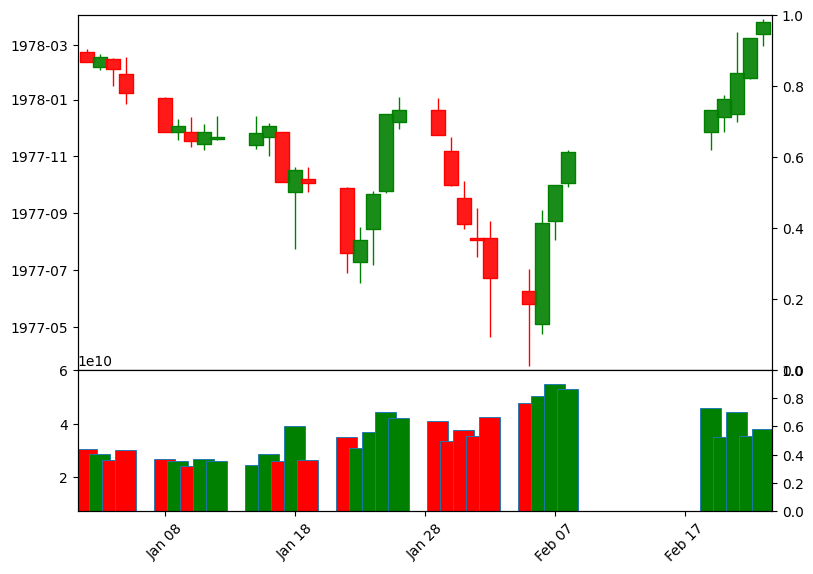

In [61]:

# 绘制K线图并添加连接线
mpf.plot(data, addplot=[line_plot], type='candle', style=s, volume=True, show_nontrading=True, tight_layout=True)